Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nate Schaefer"
COLLABORATORS = "Nick Hageman"

---

# Introduction to k-Nearest Neighbor (k-NN) Classification

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)

## Example 1: Exploration of k-NN Classification using Two Features from Iris Dataset

To better understand (and visualize) how k-NN classification works, it is often convenient to work with predicting a target from only two features. In this example, we will pick out two features (e.g., 'petal_length' and 'petal_width') from the iris dataset for prediction of the iris species (setosa, versicolor, or virginica). First, let's load the iris dataset from seaborn and then use pairplot to help visualize the relationships between pairs of features.

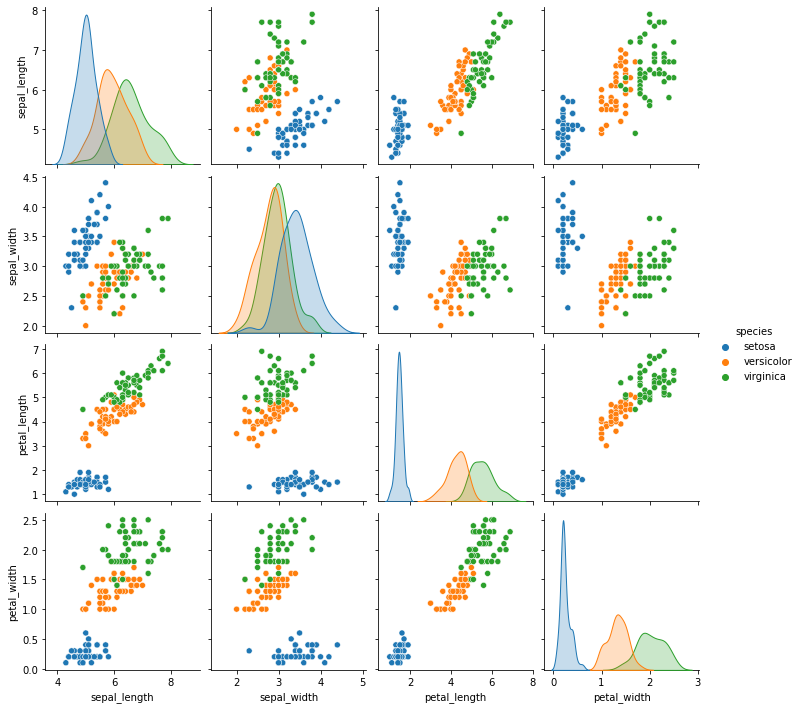

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()
sns.pairplot(iris_df,hue='species');

Based on the above plots, suppose we decide to try k-NN (k=3) classification using 'petal_length' (f1) and 'petal_width' (f2). Below, we create a pandas DataFrame with these two features as well as a 1D array of target values (converted to a numerical representation to help with a future visualization step) followed by our standard training/testing steps (testing on 25% of data). 

In [7]:
#--------------------------------------------
# kNN classification trained on two features 
#--------------------------------------------
f1 = 'petal_length'
f2 = 'petal_width'

# create dataframe with desired features
iris_features = iris_df[[f1,f2]]

# extract target as species column 
iris_target = iris_df['species']
# convert species to numbers (and save labels) 
# note: this step is primarily to help with use of pcolor
# later for visualization purposes rather than being
# needed for training/test (thus, if using this 
# example as a basis for your assignment, you do NOT
# need to include this line)
iris_target, iris_target_labels = pd.factorize(iris_target)

# separate into training/testing sets
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris_features,
                                                        iris_target,
                                                        test_size=.25)

# Set-up k-NN (k = 3) model and train on training data
model = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = model.fit(iris_train_ftrs, iris_train_tgt)

# Apply trained model to test data and evaluate using accuracy metric
predictions_test = fit.predict(iris_test_ftrs)
score = metrics.accuracy_score(iris_test_tgt, predictions_test)
print(f'kNN model accuracy: {score:0.2f}')

kNN model accuracy: 0.95


With only two features, one can actually visualize what the classifier would predict over a grid of possible feature values. Below, we create a grid of f1 and f2 values and pass those into the fit.predict function into order to get the predictions across the entire grid (to do this, we first create a 2D meshgrid of f1 and f2 values, then 'flatten' each of them to create a pandas DataFrame with one column with all of the f1 values and another column of all of the f2 values in order to get a format that the fit.predict function expects, and we finally reshape the values back to their 2D representation for plotting). We then plot the grid of prediction values [0, 1, or 2] using matplotlib's pcolormesh function (recall that it was our prior pd.factorize call that had converted the string labels into a numerical representation). Finally, we overlay a scatterplot of the training points and a scatterplot of the testing points. 

Note: the following is heavily inspired from code from scikit's examples: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html and https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

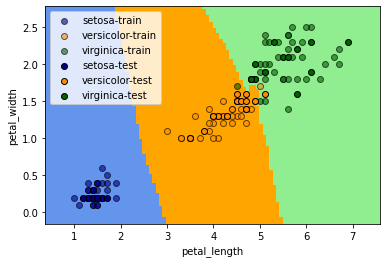

In [8]:
#------------------------------------------
# get meshgrid of f1 and f2 values to plot
# (use a range slighter larger than the
# actual range of the data)
#------------------------------------------
# start with actual min/max of f1 and f2
min_f1_val = iris_df[f1].min()
max_f1_val = iris_df[f1].max()
min_f2_val = iris_df[f2].min()
max_f2_val = iris_df[f2].max()
# increase range slightly
min_f1_val = min_f1_val - (max_f1_val - min_f1_val)/10
max_f1_val = max_f1_val + (max_f1_val - min_f1_val)/10
min_f2_val = min_f2_val - (max_f2_val - min_f2_val)/10
max_f2_val = max_f2_val + (max_f2_val - min_f2_val)/10
# use linspace to get array of 100 points for 
# f1 and f2 and in expanded range
f1_vals_to_plot = np.linspace(min_f1_val, max_f1_val, 100)
f2_vals_to_plot = np.linspace(min_f2_val, max_f2_val, 100)
# get meshgrid of f1 and f2 vlaues
f1_grid, f2_grid = np.meshgrid(f1_vals_to_plot,f2_vals_to_plot)

#------------------------------------------------
# get prediction for every point on feature grid
#------------------------------------------------
# Note: need to use ravel to flatten arrays when passing
# to sklearn's predict function
# create dataframe with one column for flattened f1 values and another
# column for flattened f2 values
f1_f2_grids_flat_df = pd.DataFrame({f1: f1_grid.ravel(), f2: f2_grid.ravel()})
#display(pd.concat([f1_f2_grids_flat_df.head(),
#                   f1_f2_grids_flat_df.tail()]))
# apply predictions on dataframe
predictions_grid_flat= fit.predict(f1_f2_grids_flat_df)
# reshape back to 2D
predictions_grid = predictions_grid_flat.reshape(f1_grid.shape)

#--------------------------
# plot grid of predictions
#--------------------------
cmap_light = ListedColormap(['cornflowerblue', 'orange', 'lightgreen'])
plt.pcolormesh(f1_grid,f2_grid,predictions_grid,cmap=cmap_light,shading='auto');

#-----------------------------------
# also plot training/testing points
#-----------------------------------
# plot the training points (one species at a time)
# make these points somewhat transparent
scatter_colors = ['darkblue', 'darkorange', 'darkgreen']
for i in range(len(iris_target_labels)):
    species_df = iris_train_ftrs[iris_train_tgt == i]
    plt.scatter(species_df[f1],species_df[f2],
                c=scatter_colors[i],alpha=0.6,
                label=iris_target_labels[i] + '-train',
                edgecolors='k')

# plot the testing points (one species at a time)
for i in range(len(iris_target_labels)):
    species_df = iris_test_ftrs[iris_test_tgt == i]
    plt.scatter(species_df[f1],species_df[f2],
                c=scatter_colors[i],
                label=iris_target_labels[i] + '-test',
                edgecolors='k')

plt.legend()
plt.xlabel(f1);
plt.ylabel(f2);

Next, let's compare the k-NN classification result and what we would obtain by computing the (Euclidean) distances ourselves from the training set data.

In [9]:
# assign f1/f2 values (assuming f1 is petal_length and f2 is petal_width)
f1_value = 5.00
f2_value = 1.65

# used trained k-NN to obtain classification
prediction = fit.predict([[f1_value,f2_value]])
print('Classification using trained k-NN:', iris_target_labels[prediction[0]])

# Note, this "works", but we are getting the warning message -- see output below:
# UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
# warnings.warn(

# The reason for the warning is that the original model kNN model was trained with a dataframe
# that has column headings, and an index.
# When we did predictions this way -- with just a list of values, SKlearn is complaining.
# This must be a change in the implementation, as we did not see this warning last semester.
# Remedy, make a dataframe.

f1_f2_dict = {"petal_length":f1_value,
              "petal_width":f2_value}
f1_f2_df = pd.DataFrame(f1_f2_dict,index=[0])
prediction = fit.predict(f1_f2_df)
print('Classification using trained k-NN:', iris_target_labels[prediction[0]])


# compute distance of point to all samples in training set
dist = np.sqrt((iris_train_ftrs[f1]-f1_value)**2 + (iris_train_ftrs[f2]-f2_value)**2)

# create pandas DataFrame for display, sort by distance values,
# and display the three closest neighbors (the predicted class
# would be the majority class of what is displayed)
dist_df = iris_train_ftrs.copy()
dist_df['dist'] = dist
dist_df['species'] = iris_train_tgt # numbers
dist_df['species'] = dist_df['species'].map(lambda x: iris_target_labels[x]) # labels
print("Distance Dataframe sorted:")
display(dist_df.sort_values('dist').head(3))

Classification using trained k-NN: versicolor
Classification using trained k-NN: versicolor
Distance Dataframe sorted:


,petal_length,petal_width,dist,species
77,5.0,1.7,0.050000,versicolor
119,5.0,1.5,0.150000,virginica
133,5.1,1.5,0.180278,virginica


## Example 2: Prediction of olympic sport from height and weight using athlete data from 2016 Summer Olympics in Rio de Janeiro.

In this example, we will work with a dataset of the athletes from the 2016 Summer Olympics in Rio de Janeiro (downloaed from https://www.kaggle.com/rio2016/olympic-games/data) to predict the olympic sport from height and weight data. In the cell below, we read the data from a csv file and limit columns to height/weight/sport (height and weight are our features and the sport is our target). We also limit the data to one sex and three sports. In addition, we convert the height values from meters in inches, the weight values from kg to lbs, and remove any rows with missing values. 

['fencing' 'athletics' 'aquatics' 'rugby sevens' 'football' 'volleyball'
 'judo' 'shooting' 'wrestling' 'rowing' 'equestrian' 'golf' 'table tennis'
 'archery' 'basketball' 'canoe' 'sailing' 'triathlon' 'tennis' 'hockey'
 'cycling' 'gymnastics' 'handball' 'taekwondo' 'badminton' 'weightlifting'
 'modern pentathlon']


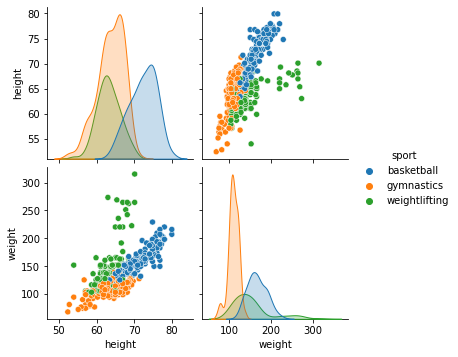

In [10]:
rio_athletes_df_orig = pd.read_csv('rio_athletes.csv')
# sex to analyze (feel free to try either one):
sex_to_analyze = 'female'
#sex_to_analyze = 'male'

# limit to one sex and create dataframe of only height/weight/sport columns 
rio_athletes_df = (rio_athletes_df_orig[rio_athletes_df_orig['sex'] == sex_to_analyze])[['height','weight','sport']]

# convert height from meters to inches
rio_athletes_df['height'] = rio_athletes_df['height']*39.3701

# convert weight from kg to lbs
rio_athletes_df['weight'] = rio_athletes_df['weight']*2.20462

# remove any rows with missing values
rio_athletes_df.dropna(inplace=True)

# display unique sports (to help us select a different set of 
# sports, if we so choose)
print(rio_athletes_df['sport'].unique())

# limit data to a smaller number of sports
sports_to_analyze = ['basketball', 'gymnastics', 'weightlifting']
rio_athletes_to_analyze = rio_athletes_df[rio_athletes_df['sport'].isin(sports_to_analyze)].copy()

# display 
rio_athletes_to_analyze.head()
sns.pairplot(rio_athletes_to_analyze,hue='sport');

We next pick sample height and weight values as a 'test' point and display the 10 closest neighbors by computing the Euclidean distance to each sample and then sorting by the computed display. (Note that, in this example, we are effectively using all of the data as a 'training' set in order to get a sense of what the classification would be on one point. Because we used all of the training data, we have no data left to evaluate the accuracy of the k-NN classifier. In your assignment, you will actually work with separate training/testing sets to also evaluate the accuracy on a similar dataset with the age added.)

In [11]:
height = 60
weight = 120
dist = np.sqrt((rio_athletes_to_analyze['height']-height)**2 + (rio_athletes_to_analyze['weight']-weight)**2)
rio_athletes_to_analyze['dist'] = dist
display(rio_athletes_to_analyze.sort_values('dist').head(10))

,height,weight,sport,dist
3292,61.023655,121.25410,gymnastics,1.618838
8916,61.417356,119.04948,gymnastics,1.706572
10785,61.811057,119.04948,gymnastics,2.045340
6252,61.811057,121.25410,gymnastics,2.202883
5525,61.811057,121.25410,gymnastics,2.202883
9206,62.204758,119.04948,gymnastics,2.400926
9889,62.992160,119.04948,gymnastics,3.139508
6028,62.992160,119.04948,gymnastics,3.139508
9589,59.842552,116.84486,weightlifting,3.159066
2588,59.448851,116.84486,weightlifting,3.202916


## Assignment: Prediction of olympic sport from height, weight, and age using athlete data from 2016 Summer Olympics in Rio de Janeiro.

In this assignment, you will extend Example 2 above to (a) add age as a feature (in addition to height and weight) (b) evaluate the accuracy with a k-NN (k=3) classifier using 67% of the data for training and 33% for testing, and (c) displaying the 10 closest neighbors in a table where only the neighbors from the TRAINING set are displayed (rather than the entire training set). The step needed to read the data from the csv file and create a pandas DataFrame with columns for height (converted to inches), weight (converted to lbs), sport (limited to three sports -- you may change the sports if you would like), and age has been completed for you in the cell below. The DataFrame is also limited to one sex (which you may also change if you would like).

### Preliminary data setup (at the end of this step, you will have a pandas DataFrame named rio_athletes_df to work with)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


1                fencing
8              athletics
14              aquatics
15          rugby sevens
18              football
46            volleyball
65                  judo
99              shooting
100            wrestling
101               rowing
103           equestrian
110                 golf
130         table tennis
131              archery
132           basketball
141                canoe
143              sailing
154            triathlon
157               tennis
162               hockey
193              cycling
210           gymnastics
213             handball
220            taekwondo
235            badminton
289        weightlifting
490    modern pentathlon
Name: sport, dtype: object

,height,weight,sport,age
100,67.322871,147.70954,wrestling,22
104,68.110273,169.75574,wrestling,25
132,66.929170,143.30030,basketball,37
141,68.110273,132.27720,canoe,22
153,68.897675,152.11878,wrestling,33


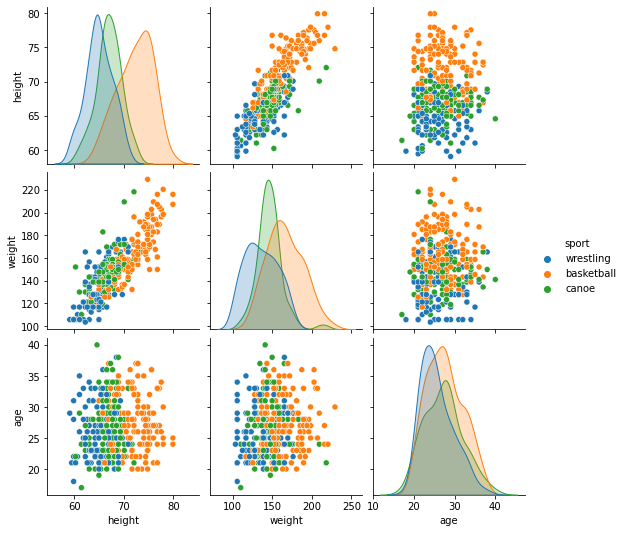

In [12]:
rio_athletes_df_orig = pd.read_csv('rio_athletes.csv')
# sex to analyze (feel free to try either one):
sex_to_analyze = 'female'
#sex_to_analyze = 'male'

display(rio_athletes_df_orig)

# limit to one sex and create dataframe of only dob/height/weight/sport columns 
rio_athletes_df = (rio_athletes_df_orig[rio_athletes_df_orig['sex'] == sex_to_analyze])[['dob','height','weight','sport']]

# remove any rows with missing values
rio_athletes_df.dropna(inplace=True)

# convert height from meters to inches
rio_athletes_df['height'] = rio_athletes_df['height']*39.3701

# convert weight from kg to lbs
rio_athletes_df['weight'] = rio_athletes_df['weight']*2.20462

# convert date strings to actual dates (date object)
from datetime import datetime
date_format = "%m/%d/%y"  # month zero padded, day zero padded, 2-didgit year
rio_athletes_df['dob'] = rio_athletes_df['dob'].map(lambda x: datetime.strptime(x,date_format))

# add age column (at start of games: 8/5/2016)
from dateutil.relativedelta import relativedelta
olympics_start = datetime.strptime('08/05/2016','%m/%d/%Y')
rio_athletes_df['age'] = rio_athletes_df['dob'].map(lambda x: relativedelta(olympics_start,x).years)

# drop dob column as we no longer need it
rio_athletes_df = rio_athletes_df.drop(['dob'],axis=1)

# Comment/Uncomment these 2 lines -- to hide/see the list of all sports
# The .drop_duplicates() method returns a new dataframe
unique_sports = rio_athletes_df['sport'].drop_duplicates()
display(unique_sports)



# only keep sports of interest (note: you may change these if you would like)
# fill in the sports you would like to analyze (optional)
#sports_to_analyze = ['basketball', 'gymnastics', 'triathlon']
# AND comment out the line below -- that selects at random

# select 3 sports at random
sports_to_analyze = unique_sports.sample(n=3)
rio_athletes_df = rio_athletes_df[rio_athletes_df['sport'].isin(sports_to_analyze)]
display(rio_athletes_df.head())

# show pairplot
sns.pairplot(rio_athletes_df, hue='sport');

### Step 1: Divide into train/test sets (67% for training/33% for testing) and perform k-NN (k = 3) classification (fitting model to training set and reporting accuracy on test set). The target should be the sport.

Hint: you did something very similar for your lec04 assignment.

In [13]:
#----------------------------------------------------------------
# Separate features from targets so we can call train_test_split
#----------------------------------------------------------------
# YOUR CODE HERE
f1 = 'height'
f2 = 'weight'
f3 = 'age'

rio_features = rio_athletes_df[[f1,f2,f3]]

rio_target = rio_athletes_df['sport']


#-------------------------------------------------------------
# Separate into train and test sets (33% of data for testing)
#-------------------------------------------------------------
# YOUR CODE HERE
(rio_train_ftrs, rio_test_ftrs,
 rio_train_tgt, rio_test_tgt) = skms.train_test_split(rio_features,
                                                        rio_target,
                                                        test_size=.33)


#----------------------------------------------
# Set-up k-NN model and train on training data
#----------------------------------------------
# YOUR CODE HERE
kNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN_fit = kNN_model.fit(rio_train_ftrs, rio_train_tgt)




#---------------------------------------------------------------------
# Apply trained model to test data and evaluate using accuracy metric
#---------------------------------------------------------------------
# YOUR CODE HERE
kNN_predictions = kNN_fit.predict(rio_test_ftrs)
kNN_score = metrics.accuracy_score(rio_test_tgt, kNN_predictions)
print(f'kNN model accuracy: {kNN_score:0.2f}')


kNN model accuracy: 0.62


### Step 2: define values of your choice for the height, weight, and age and display what sport the classifier you trained above would predict for this set of values. Also, compute the (Euclidean) distance to each sample in the TRAINING set (not the entire dataset) and display the 10 closest points as a pandas DataFrame.

In [14]:
#-------------------------------------------------------------
# Define values for weight, height, and age; apply classifier
# trained above; and display corresponding prediction
#-------------------------------------------------------------
# YOUR CODE HERE
height = 65
weight = 185
age = 25


prediction = kNN_fit.predict([[height,weight,age]])
print('Classification using trained k-NN:', prediction[0])





#---------------------------------------------------------
# Compute the (Euclidean) distance to each sample in the 
# training set and display the 10 closest points as a
# pandas DataFrame. 
#
# 1: Hint: you will want to use the
# columns from the training features DataFrame returned
# from your call to train_test_split to compute a Series
# of distance values (similar to what we did in Example 2,
# but with three features rather than two and with the
# training set rather than the whole set). 
#
# 2: You will then want to create a pandas DataFrame (starting with a copy 
# of your feature columns as a starting point) with these 
# distance values added AND the target sport column added 
# before displaying a sorted version of this DataFrame 
# (sorted by the distance column you added).
#---------------------------------------------------------
# YOUR CODE HERE
dist = np.sqrt((rio_train_ftrs['height']-height)**2 + (rio_train_ftrs['weight']-weight)**2 + (rio_train_ftrs['age']-age)**2)

rio_features['dist'] = dist
rio_features['sport'] = rio_target

display(rio_features.sort_values('dist').head(10))



Classification using trained k-NN: basketball


,height,weight,age,dist,sport
4547,65.748067,182.98346,28,3.691346,canoe
10648,74.015788,187.39270,25,9.327885,basketball
6896,74.803190,185.18808,26,9.855857,basketball
7100,74.409489,185.18808,22,9.877948,basketball
11523,68.897675,176.36960,22,9.933563,wrestling
4742,74.803190,185.18808,27,10.006893,basketball
9969,74.803190,187.39270,24,10.140392,basketball
1176,74.409489,187.39270,28,10.161865,basketball
8875,75.196891,187.39270,25,10.473853,basketball
6635,72.834685,180.77884,31,10.733149,basketball


In [15]:
dict1 = {7:3.5, 'a':11, True:[1, 2, 3], False:'false'}
dict2 = {False:'false', True: [1, 2, 3], 'a': 11, 7: 3.5}
print(dict1)
print(dict2)

x = range(2,6)
print(set(tuple(range(2,6))))
print(x)


{7: 3.5, 'a': 11, True: [1, 2, 3], False: 'false'}
{False: 'false', True: [1, 2, 3], 'a': 11, 7: 3.5}
{2, 3, 4, 5}
range(2, 6)
